# 生成1万张6层地图

In [3]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap, tileid_to_json
import numpy as np
import random
from datetime import datetime
import os
import cv2
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
ids,_ = wfc.generate(out_img=False)
file_name = "./wfc_unity2_render/mac_build/1209_mac_built.app/Contents/MacOS/tilemap_render"
unity_env = WFCUnity3DEnv(file_name=file_name)
# unity_env.set_wave(ids)
# img1 = unity_env.render_in_unity(camera_index=0)
# plt.imshow(img)
# plt.pause(0.01)
tag = "connect_random"
# tag = "sparse_random"
# tag = "not_connect_random"
for layer in [6]:
    layer_tag = f"{layer}layer"
    time_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    json_save_path = f"{layer_tag}_{tag}_{time_str}/jsons"
    img_save_path = f"{layer_tag}_{tag}_{time_str}/imgs"
    os.makedirs(json_save_path, exist_ok=True)
    os.makedirs(img_save_path, exist_ok=True)
    iter2 = 10000
    for i in range(iter2):
        ids,img1 = wfc.generate(out_img=False)
        # unity_env.set_wave(ids)
        # img1 = unity_env.render_in_unity(camera_index=0)
        while len(np.bincount(tilemap2heightmap(ids))) != layer+1:
            ids,_ = wfc.generate(out_img=False)
        unity_env.set_wave(ids)
        img1 = unity_env.render_in_unity(camera_index=0)
        img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
        tileid_to_json(ids, f"{json_save_path}/{i}.json")
        cv2.imwrite(f"{img_save_path}/{i}.png", img1_bgr)


Trying to connect to 0.0.0.0:19573


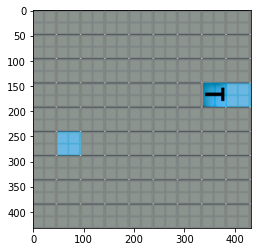

In [22]:
import fastwfc
import matplotlib.pyplot as plt
wfc = fastwfc.XLandWFC("samples.xml")
empty = wfc.build_a_open_area_wave()
id, img = wfc.mutate(base_wave=empty, out_img=True, new_weight=162, iter_count=1)
plt.imshow(img)
plt.pause(0.01)

In [5]:
tilemap2heightmap(ids)
np.bincount(tilemap2heightmap(ids))


array([ 0, 14, 16, 19, 10, 13,  9])

# Step1，2层
## Step1.1 分别生成2层友好地图

In [2]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap, tileid_to_json
import numpy as np
import random
from datetime import datetime
import os
import cv2
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
ids,img = wfc.generate(out_img=True)
# plt.imshow(img)
# plt.pause(0.01)
# tag = "connect_random"
tag = "sparse_random"
# tag = "not_connect_random"
layer_tag = "6layer"
time_str = datetime.now().strftime("%Y%m%d_%H%M%S")
json_save_path = f"{layer_tag}_{tag}_{time_str}/jsons"
img_save_path = f"{layer_tag}_{tag}_{time_str}/imgs"
os.makedirs(json_save_path, exist_ok=True)
os.makedirs(img_save_path, exist_ok=True)
iter2 = 10000
for i in range(iter2):
    ids,img1 = wfc.generate(out_img=True)
    while len(np.bincount(tilemap2heightmap(ids))) != 7:
        ids,img1 = wfc.generate(out_img=True)
    img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    tileid_to_json(ids, f"{json_save_path}/{i}.json")
    cv2.imwrite(f"{img_save_path}/{i}.png", img1_bgr)


KeyboardInterrupt: 

In [2]:
from utils import calc_entropy, cs_divergence, json_to_tileid, tileid_to_json, tilemap2heightmap
import numpy as np
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data
import os
import datetime
import cv2
min_length = 81
# def length_list_to_dist(length_list: np.ndarray) -> np.ndarray:
    # return np.bincount(length_list.reshape(-1), minlength=min_length) / np.bincount(length_list.reshape(-1), minlength=min_length).sum()
import networkx as nx
import matplotlib.pyplot as plt
import time
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")
layer_id = 3
tag_layer = f"{layer_id}layer"
tag = "sparse"
wave = wfc.build_a_open_area_wave()
ids = wfc.get_ids_from_wave(wave)
time_str = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
save_path = f"{tag_layer}_{tag}_maps_start_from_empty_{time_str}"
img_save_path = os.path.join(save_path, "imgs")
json_save_path = os.path.join(save_path, "jsons")
os.makedirs(json_save_path, exist_ok=True)
os.makedirs(img_save_path, exist_ok=True)
json_data = tileid_to_json(ids, save_path=os.path.join(json_save_path, "0.json"))
img_data = wfc.mutate(base_wave=wave, out_img=True, iter_count=1, new_weight=10000)[1]
img_bgr = cv2.cvtColor(img_data, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(img_save_path, "0.png"), img_bgr)
map_id = 1
base_wave = wave
max_iters = 1000
while max_iters>0:
    DG = map2digraph(tiles2data(wfc.get_ids_from_wave(base_wave)))
    dist1 = get_map_shortest_length_dist(DG, norm=False)
    new_ids, img = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=True)
    new_wave = wfc.wave_from_id(new_ids)
    DG2 = map2digraph(tiles2data(new_ids))
    dist2 = get_map_shortest_length_dist(DG2, norm=False)
    max_iters-=1
    count = 0
    while np.abs(cs_divergence(dist1, dist2)) > 0.2 or np.abs(cs_divergence(dist1, dist2)) == 0.0 or len(np.bincount(tilemap2heightmap(new_ids))) != layer_id+1:
        print(np.bincount(tilemap2heightmap(new_ids)))
        count +=1
        new_ids, img = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=True)
        new_wave = wfc.wave_from_id(new_ids)
        DG2 = map2digraph(tiles2data(new_ids))
        dist2 = get_map_shortest_length_dist(DG2, norm=False)
    print(cs_divergence(dist1, dist2))
    dist1 = dist2
    base_wave=new_wave
    ids = wfc.get_ids_from_wave(base_wave)
    json_data = tileid_to_json(ids, save_path=os.path.join(json_save_path, f"{map_id}.json"))
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(img_save_path,f"{map_id}.png"), img_bgr)
    map_id+=1
    # unity3d_env.set_wave(wave=new_wave)
    # unity3d_env.render_in_unity()
    # time.sleep(0.5)

[ 0 81]
[ 0 81]
[ 0 78  3]
[ 0 79  2]
[ 0 81]
[ 0 79  2]
[ 0 77  4]
0.18670804378647315
0.11313026664431632
0.1311653559678926
0.112189191154717
0.18350875736281153
[ 0 63 10  8]
0.11587011585331354
[ 0 70  9  2]
[ 0 63 12  6]
0.1435468228832896
0.16768995660623806
0.19358180659419758
[ 0 60 15  6]
[ 0 59 16  6]
[ 0 58 17  6]
[ 0 58 15  8]
0.003911590302696826
[ 0 56 16  9]
[ 0 59 15  7]
[ 0 60 15  6]
0.19069304845441423
[ 0 59 15  7]
[ 0 59 15  7]
[ 0 59 15  7]
0.17877279491858528
0.004031694927048541
[ 0 54 17 10]
[ 0 58 15  8]
0.18162408035983155
0.0053734707668375865
[ 0 57 18  6]
[ 0 57 17  7]
[ 0 57 18  6]
[ 0 59 18  4]
0.13645288838367556
[ 0 57 18  6]
[ 0 56 20  5]
0.029359420757619777
[ 0 55 21  5]
[ 0 55 21  5]
[ 0 55 21  5]
[ 0 55 21  5]
[ 0 54 22  5]
[ 0 53 23  5]
[ 0 55 21  5]
[ 0 55 23  3]
[ 0 55 21  5]
0.05319145576870017
[ 0 57 23  1]
0.0007289800188271774
0.15418816109080058
0.17600217047553732
0.006856442875564847
0.18746062520885268
[ 0 47 28  6]
[ 0 49 31  1]
0.0073

In [45]:
print(np.bincount(tilemap2heightmap(ids)))


[ 0 37 36  8]


[(1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (21, 3), (1, 0), (21, 1), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (21, 3), (1, 0), (21, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (21, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (21, 3), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (21, 1), (0, 0), (21, 0), (1, 0), (0, 0), (0, 0), (1, 0), (21, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (21, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0)]


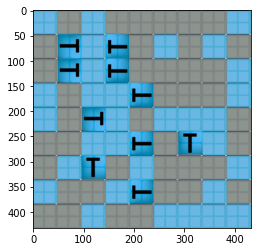

In [28]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap
import numpy as np
import random
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
# base_wave = wfc.build_a_open_area_wave()
# ids, img1 = wfc.mutate(base_wave=base_wave, new_weight=162, iter_count=1, out_img=True)
ids,img1 = wfc.generate(out_img=True)
print(ids)
# q = tilemap2heightmap(ids)
# img2 = None
# base_wave = wfc.wave_from_id(ids)
# # 筛选最高高度为2(0没有实际意义)的地图，即2层地图
# while len(np.bincount(q)) !=3:
#     ids, img2 = wfc.mutate(base_wave=base_wave, new_weight=162, iter_count=1, out_img=True)
#     q = tilemap2heightmap(ids)
#     base_wave = wfc.wave_from_id(ids)
# print(np.bincount(q))
plt.imshow(img1)
plt.pause(0.01)

## Step 1.2 均匀散度取样

In [8]:
from utils import calc_entropy, cs_divergence, json_to_tileid, tileid_to_json,tilemap2heightmap
import numpy as np
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data
import os
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import time
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")

ids = json_to_tileid("layer2_basewave.json")
base_wave = wfc.wave_from_id(ids)
time_tag = str(datetime.datetime.now()).replace(" ", "_").replace(":", "_").replace(".", "_")
save_path = f"two_layers_easy_group_{time_tag}"
target_height_map_dist = np.bincount(tilemap2heightmap(ids), minlength=7)
print(target_height_map_dist)
os.makedirs(save_path, exist_ok=True)


[ 0 12 69  0  0  0  0]


In [9]:
max_iters = 100
map_id = 0
target_list = list(np.arange(0,1,0.1)+0.1)
error = 0.01
height_error = 25
for target in target_list:
    print(f"Generating map with diver: {target}...")
    DG = map2digraph(tiles2data(wfc.get_ids_from_wave(base_wave)))
    dist1 = get_map_shortest_length_dist(DG, norm=False)
    new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=600,iter_count=1,out_img=False)
    new_wave = wfc.wave_from_id(new_ids)
    DG2 = map2digraph(tiles2data(new_ids))
    dist2 = get_map_shortest_length_dist(DG2, norm=False)
    count = 0
    diver = np.abs(cs_divergence(dist1, dist2))
    height_distance = np.linalg.norm(target_height_map_dist - np.bincount(tilemap2heightmap(new_ids), minlength=7))
    # min_target_distance = 999
    min_fitness = 999
    while (diver > (target+error) or diver < (target-error)) or (len(np.bincount(tilemap2heightmap(new_ids)))!=3 or height_distance > height_error):
        print(f"height_distance: {height_distance}, layer: {len(np.bincount(tilemap2heightmap(new_ids)))}")
        print(f"diver: {diver}, target: {target}")
        fitness  = np.abs(diver-target) + height_distance
        count +=1
        while len(np.bincount(tilemap2heightmap(new_ids)))!=3:
            new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=False)
        new_wave = wfc.wave_from_id(new_ids)
        DG2 = map2digraph(tiles2data(new_ids))
        dist2 = get_map_shortest_length_dist(DG2, norm=False)
        diver = cs_divergence(dist1, dist2)
        height_distance = np.linalg.norm(target_height_map_dist - np.bincount(tilemap2heightmap(new_ids), minlength=7))
        if fitness < min_fitness:
            min_fitness = fitness
            print(f"diver:{diver},height_distance:{height_distance},min_fitness:{fitness}, layer{len(np.bincount(tilemap2heightmap(new_ids)))}")
            base_wave = new_wave
    new_ids = wfc.get_ids_from_wave(new_wave)
    json_data = tileid_to_json(new_ids, save_path=os.path.join(save_path, f"{diver}.json"))
    max_iters-=1
    print(f"Done")
    print(f"{diver}.json saved")

Generating map with diver: 0.1...
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
diver:0.0006908585262460022,height_distance:1.4142135623730951,min_fitness:1.513522703846849, layer3
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.0006908585262460022, target: 0.1
height_distance: 1.4142135623730951, layer: 3
diver: 0.000690858526246002

KeyboardInterrupt: 

['two_layers_easy_group_2022-12-03_01_19_01_681347/0.10612840319827964.json', 'two_layers_easy_group_2022-12-03_01_19_01_681347/0.20125028629410166.json', 'two_layers_easy_group_2022-12-03_01_19_01_681347/0.29077935319829423.json']


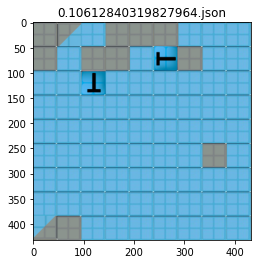

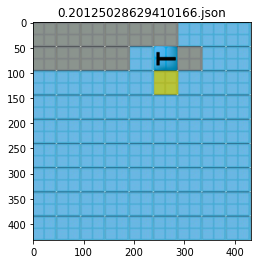

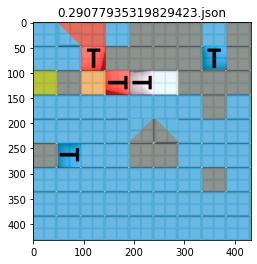

In [10]:
from utils import json_to_tileid
# render all results
save_path = "two_layers_easy_group_2022-12-03_01_19_01_681347"
from glob import glob
import re
all_json_files = sorted(glob(os.path.join(save_path, "*.json")))
print(all_json_files)
for json_file in all_json_files:
    file_name = os.path.basename(json_file)
    tile_ids = json_to_tileid(json_file)
    wave = wfc.wave_from_id(tile_ids)
    _,img = wfc.mutate(base_wave=wave,new_weight=99999,iter_count=1,out_img=True)
    plt.imshow(img)
    plt.title(file_name)
    plt.pause(0.01)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
import numpy as np
def get_no_path_pair_rate(ids):
    DG = map2digraph(tiles2data(ids))
    all_pair_shortest_path, all_pair_shortest_path_dict = get_all_pair_shortest_path(DG, return_dict=True)
    all_pair_length = []
    for pair in all_pair_shortest_path:
        all_pair_length.append(len(pair))
    no_path_pair_count = 0
    for i in DG.nodes:
        for j in DG.nodes:
            if i!=j and j not in all_pair_shortest_path_dict[i].keys():
                no_path_pair_count += 1
    no_path_pair_rate = no_path_pair_count /(len(DG.nodes)**2)
    return no_path_pair_rate, np.mean(all_pair_length)

In [12]:
rate,_ = get_no_path_pair_rate(ids)
target_rate = 0
min_rate = 1000
iter_count = 100
count = 0
base_wave = wave
while count < iter_count:
    count+=1
    new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=80,iter_count=1,out_img=False)
    new_rate, _ = get_no_path_pair_rate(new_ids)
    if new_rate < min_rate:
        min_rate = new_rate
        min_rate_ids = new_ids
        base_wave = wfc.wave_from_id(new_ids)
        print(count, min_rate)


NameError: name 'wave' is not defined

In [4]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap, tileid_to_json, cs_divergence
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import random
import datetime

# 生成大量2层地图，人工筛选

In [5]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap, tileid_to_json
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import random
import datetime
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
base_wave = wfc.build_a_open_area_wave()
time_tag = str(datetime.datetime.now()).replace(" ", "_").replace(":", "_").replace(".", "_")
json_save_path =  f"two_layers_random_maps_{time_tag}/jsons"
img_save_path = f"two_layers_random_maps_{time_tag}/imgs"
os.makedirs(json_save_path, exist_ok=True)
os.makedirs(img_save_path, exist_ok=True)
total = 10000
for i in tqdm(range(75,total)):
    # ids, img1 = wfc.mutate(base_wave=base_wave, new_weight=81, iter_count=5, out_img=True)
    ids, img1 = wfc.generate(out_img=True)
    while len(np.bincount(tilemap2heightmap(ids)))!=3:
        ids, img1 = wfc.mutate(base_wave=wfc.wave_from_id(ids), new_weight=81, iter_count=5, out_img=True)
    tileid_to_json(ids, save_path=os.path.join(json_save_path, f"{i}.json"))
    # save img
    img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(img_save_path, f"{i}.png"), img1_bgr)



  0%|          | 0/9925 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap, tileid_to_json, cs_divergence
import numpy as np
import random
import cv2
from tqdm.notebook import tqdm
import random
import datetime
start_from = 45
json_save_path = os.path.join("two_layers_random_maps_2022-12-03_01_49_52_163084", "jsons")
img_save_path =  os.path.join("two_layers_random_maps_2022-12-03_01_49_52_163084", "imgs")
wfc = fastwfc.XLandWFC("samples.xml")
total = 10000
base_wave = wfc.build_a_open_area_wave()
for i in tqdm(range(150,total)):
    # ids, img1 = wfc.mutate(base_wave=base_wave, new_weight=81, iter_count=1, out_img=True)
    ids, img1 = wfc.generate(out_img=True)
    DG = map2digraph(tiles2data(wfc.get_ids_from_wave(base_wave)))
    dist1 = get_map_shortest_length_dist(DG, norm=False)
    new_ids, img1 = wfc.mutate(base_wave=base_wave,new_weight=162,iter_count=1,out_img=True)
    new_wave = wfc.wave_from_id(new_ids)
    DG2 = map2digraph(tiles2data(new_ids))
    dist2 = get_map_shortest_length_dist(DG2, norm=False)
    while np.abs(cs_divergence(dist1, dist2)) > 0.009 or np.abs(cs_divergence(dist1, dist2)) == 0.0:
        print(np.abs(cs_divergence(dist1, dist2)) )
        # if len(np.bincount(tilemap2heightmap(new_ids)))!=3:
            # continue
        new_ids, img1 = wfc.mutate(base_wave=wfc.wave_from_id(new_ids), new_weight=162, iter_count=1, out_img=True)
        new_wave = wfc.wave_from_id(new_ids)
        DG2 = map2digraph(tiles2data(new_ids))
        dist2 = get_map_shortest_length_dist(DG2, norm=False)
    base_wave = new_wave
    tileid_to_json(new_ids, save_path=os.path.join(json_save_path, f"{i}.json"))
    # save img
    img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(img_save_path, f"{i}.png"), img1_bgr)

  0%|          | 0/9850 [00:00<?, ?it/s]

0.0
0.0
0.0
0.0
0.1256122521711364
0.16423807315481836
0.1825465079695151
0.1825465079695151
0.20368942724715536
0.2331377000490923
0.2253662401261315
0.23211906710122548
0.24945257424835235
0.29844367967020696
0.5448982390058469
0.5585521771127733
0.28839340553944004
0.2839134587522482
0.3557127356870154
0.39377004672913013
0.4610646404129765
0.4513421602790679
0.46506399778093516
0.4134985283244661
0.3809727206536455
0.34406130488018394
0.26944583816259027
0.32741586316397664
0.3758719916327635
0.38199426286545
0.38199426286545
0.3819910789253402
0.4194287148971515
0.3724676549467654
0.4186178688297733
0.3676833182339249
0.3387750462075741
0.35901252416331275
0.33512376530623783
0.5046082168017857
0.5265455391780661
0.4653612646218074
0.4397220802780638
0.4390196128570511
0.5080449439897858
0.5061609277091306
0.5061609277091306
0.5260513216386493
0.5268863926199333
0.5087772558790992
0.5227441913853351
0.611128648396694
0.6270251187715042
0.6333306755553936
0.6043330621045386
0.62305

KeyboardInterrupt: 

In [10]:
!pwd

/Users/yinzi/wfc_unity2


# 根据连接性来生成地图
